从我们学习了感知机，关于感知机这个东西，好消息：即便对于复杂的函数，感知机也隐含着能够表示它的可能性
坏消息是，设定权重的工作，即确定合适的、能符合预期的输入与输出的权重，现在还是由人工进行的

## 3.1从感知机到神经网络

### 3.1.1神经网络的例子

![11](Figure/331.png)

输入层 中间层(隐藏层) 输出层

### 3.1.2激活函数登场

激活函数：函数将输入信号的总和转换为输出信号。激活函数的作用在于决定如何来激活输入信号的总和

$$
a = b + w_1 x_1 + w_2 x_2 \quad (1)
$$

$$
y = h(a) \quad (2)
$$

先计算输入信号的加权总和，然后 再用激活函数转换这一总和，得到上面两个式子

之前的神经元都是用一个○表示的，如果要在图中明确表示出式（1）和式（2），则可以像图3-4这样做。

![999](Figure/332.png)

激活函数是连接感知机和神经网络的桥梁。

## 3.2激活函数
以阈值为界，一旦输入超过阈值，就切换输出，这样的函数称为“阶跃函数”，感知机就是使用了阶跃函数，如果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了

### 3.2.1　sigmoid函数
$$
h(x) = \frac{1}{1 + \exp(-x)}
$$
实际上，感知机和神经网络的主要区别就在于这个激活函数。其他方面，比如神经元的多层连接的构造、信号的传递方法等，基本上和感知机是一样的


### 3.2.2　阶跃函数的实现

In [1]:
import pickle


def step_function(x):
    if x>0:
        return 1
    else:
        return 0

此时参数x只能接受实数（浮点数），但不允许参数取Numpy数组。例如np.array[1.0,2.0],为了突破这一限制，我们考虑以下实现：

In [2]:
import numpy as np
def step_function(x):
    y = x > 0#布尔判断
    return y.astype(np.int)

In [3]:
x=np.array([0,2,3,4,5])
y=x>0#此时y是一个布尔型数组
y=y.astype(np.int64)
y#astype()方法转换NumPy数组的类型,true转换为1，False转换为0

array([0, 1, 1, 1, 1])

### 3.2.3　阶跃函数的图形

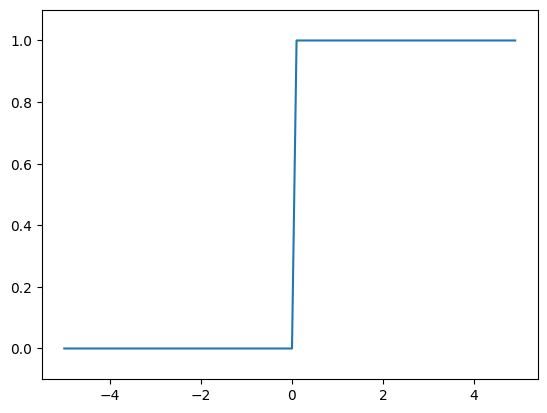

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def step_function(x):
    y=x > 0
    z=y.astype(np.int64)
    return z

x=np.arange(-5.0,5.0,0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)# 指定y轴的范围
plt.show()

如图，阶跃函数以0为界，输出从0切换为1。它的值呈阶梯式变化，所以称为阶跃函数

### 3.2.4　sigmoid函数的实现

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x=np.array([0,2,3,4,5])
sigmoid(x)

array([0.5       , 0.88079708, 0.95257413, 0.98201379, 0.99330715])

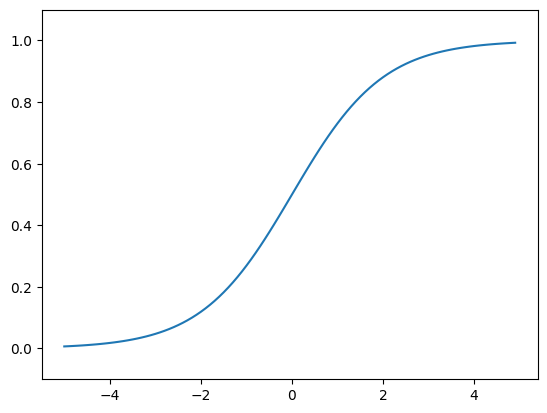

In [6]:
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

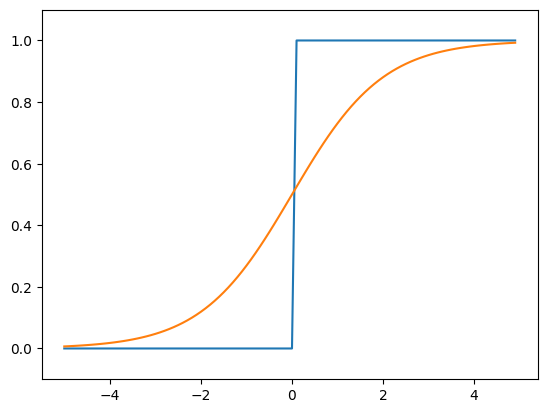

In [7]:
y1=step_function(x)
y2=sigmoid(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.ylim(-0.1,1.1)
plt.show()

### 3.2.6　非线性函数

神经网络的激活函数必须使用非线性函数,因为使用线性函数的话，加深神经网络的层数就没有意义了

### 3.2.7　ReLU函数
Rectified Linear Unit

ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输
出0

In [8]:
def relu(x):
    return np.maximum(0,x)

## 3.3 多维数组的运算

### 3.3.1　多维数组

In [9]:
A=np.array([1,2,3,4,5])
print(A)
print(np.ndim(A))
print(A.shape)
A.shape[0]

[1 2 3 4 5]
1
(5,)


5

In [10]:
B=np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
print(B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)
3


### 3.3.2　矩阵乘法

In [11]:
A=np.array([[1,2,3],[3,4,5],[5,6,7]])
B=np.array([[1,2,3],[3,4,5],[5,6,7]])
C=np.dot(A,B)#点积
C

array([[22, 28, 34],
       [40, 52, 64],
       [58, 76, 94]])

### 3.3.3　神经网络的内积

![999](Figure/333.png)

In [12]:
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
print(W)
Y=np.dot(X,W)
print(Y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


## 3.4 3层神经网络的实现

### 3.4.1　各层间信号传递的实现

In [13]:
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.6],[0.2,0.5,0.3]])
B1=np.array([0.1,0.3,0.3])
print(W1.shape)
print(B1.shape)
print(X.shape)
A1=np.dot(X,W1)+B1
A1


(2, 3)
(3,)
(2,)


array([0.3 , 0.85, 1.05])

![99](Figure/342.png)

In [14]:
#使用sigmoid函数
Z1=sigmoid(A1)
print(Z1)
print(A1)

[0.57444252 0.70056714 0.7407749 ]
[0.3  0.85 1.05]


接下来我们来实现第一层到第二层的信号传递。

In [15]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.6270987  0.77285898]


输出层所用的激活函数，要根据求解问题的性质决定。一般地，回归问题可以使用恒等函数，二元分类问题可以使用 sigmoid函数，

多元分类问题可以使用 softmax函数。关于输出层的激活函数，我们将在下一节详细介绍。

### 3.4.3　代码实现小结

In [16]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])

    network['B1']=np.array([0.1,0.2,0.3])

    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2']=np.array([0.1,0.2])

    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])

    network['B3']=np.array([0.1,0.2])

    return network

def forward(network, x):
    W1=network['W1']
    B1=network['B1']
    W2=network['W2']
    B2=network['B2']
    W3=network['W3']
    B3=network['B3']

    a1=np.dot(x,W1)+B1
    z1=sigmoid(a1)

    a2=np.dot(z1,W2)+B2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+B3
    y=a3

    return y

network=init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

#init_network()函数会进行权重和偏置的初始化，并保存在字典变量network

#forward()函数中则封装了将输入信号转换为输出信号的处理过程

[0.31682708 0.69627909]


## 3.5 输出层的设计

神经网络可以用在分类问题和回归问题上，需要根据情况改变输出层的激活函数

一般来说，回归问题使用恒等函数，分类问题使用softmax函数

### 3.5.1　恒等函数和 softmax函数

恒等函数不必多说；softmax函数表示如下：
$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
$$
分子是输入信号，分母是所有输入信号的和

我们使用代码来实现softmax函数：

In [17]:
a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a)
b=np.sum(exp_a)
y=exp_a/b
y


array([0.01821127, 0.24519181, 0.73659691])

In [18]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

### 3.5.2　实现 softmax函数时的注意事项

如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况

我们这样改进原来公式

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)} = \frac{C \exp(a_k)}{C \sum_{i=1}^{n} \exp(a_i)}
$$
$$
= \frac{\exp(a_k + \log C)}{\sum_{i=1}^{n} \exp(a_i + \log C)}
$$
$$
= \frac{\exp(a_k + C')}{\sum_{i=1}^{n} \exp(a_i + C')}
$$

C撇可以使用任何值，一般会使用输入信号中的最大值。


In [19]:
# 示例,在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果
a=np.array([900,1000])#数值太大会溢出
#np.exp(a)/np.sum(np.exp(a))
c=np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

array([3.72007598e-44, 1.00000000e+00])

### 3.5.3　softmax函数的特征

In [20]:
 a = np.array([0.3, 2.9, 4.0])
 y = softmax(a)
 np.sum(y)

np.float64(1.0)

softmax函数的输出是0.0到1.0之间的实数,总和是1，正因为有了这个性质，我们才可以把softmax函数的输出解释为“概率”

## 3.6 手写数字识别

### 3.6.1　MNIST数据集

In [21]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [22]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
def img_show(img):

    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)
img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)
img_show(img)

5
(784,)
(28, 28)


标签: 5
原始图像形状: (784,)
重塑后的图像形状: (28, 28)


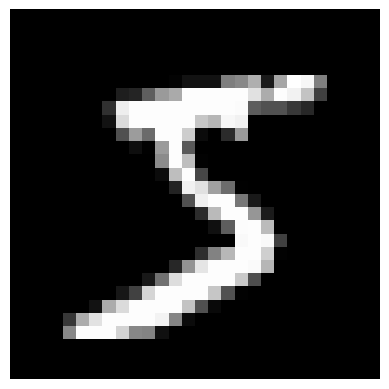

In [23]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

def img_show_plt(img):
    # 1. 使用 imshow 显示图像。
    #    - cmap='gray' 指定颜色映射为灰度，因为 MNIST 图像是单通道的灰度图。
    #    - interpolation='nearest' 可以让图像显示更清晰，避免插值模糊。
    plt.imshow(img, cmap='gray', interpolation='nearest')
    # 2. 移除坐标轴，使图像看起来更简洁
    plt.axis('off')
    # 3. 显示图形窗口
    plt.show()

# 加载数据 (保持不变)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
normalize=False)

# 准备要显示的图像 (保持不变)
img = x_train[0]
label = t_train[0]
print(f"标签: {label}")
# 展平图像形状: (784,)
print(f"原始图像形状: {img.shape}")
# 重新塑形图像：(784,) 变回 (28, 28)
img = img.reshape(28, 28)
print(f"重塑后的图像形状: {img.shape}")
# 调用新的 Matplotlib 显示函数
img_show_plt(img)

### 3.6.2　神经网络的推理处理

我们对这个数据集实现神经网络的推理处理。神经网络的输入层有784个神经元，输出层有10个神经元。

输入层的784这个数字来源于图像大小的28 × 28 = 784，输出层的10这个数字来源于10类别分类，数字0到9，共10类别

此外，这个神经网络有2个隐藏层，第1个隐藏层有50个神经元，第2个隐藏层有100个神经元。这个50和100可以设置为任何值

In [24]:
import pickle
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,normalize=True,one_hot_label=False,)
    return x_test, t_test
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        return network
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)
    return y


init_network()会读入保存在pickle文件sample_weight.pkl中的学习到的权重参数A。这个文件中以字典变量的形式保存了权重和偏置参数。剩余的2个函数，和前面介绍的代码实现基本相同，无需再解释。现在，我们用这3个函数来实现神经网络的推理处理。然后，评价它的识别精度，即能在多大程度上正确分类。

In [25]:
x,t=get_data()
network=init_network()
#初始化一个计数器变量，用于记录模型正确识别的图片数量
accuracy_cnt=0
for i in range(len(x)):
    y=predict(network, x[i])
    p=np.argmax(y)
    if p==t[i]:
        accuracy_cnt+=1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


首先获得了MNIST数据集生成网络，接着用for语句逐一取出保存在x中的图像数据

### 3.6.3批处理

我们来关注输入数据和权重参数的“形状”

In [26]:
 x, _ = get_data()
 network=init_network()
 w1,w2,w3=network['W1'], network['W2'], network['W3']
 x.shape

(10000, 784)

In [27]:
x[0].shape

(784,)

In [28]:
w1.shape

(784, 50)

![99](Figure/363.png)

输入从一个由784个元素（由28*28的二维数组展开）的一维数组，输出一个有10个元素的一维数组

现在我们来考虑打包输入多张图像的情形。我们想用predict()函数一次性打包处理100张图像。为此，可以把x的形状改为100 × 784，将100张图像打包作为输入数据。用图表示的话，如图3-27所示。

![999](Figure/364.png)


In [29]:
#基于批处理的代码实现：
x,t=get_data()
network=init_network()
batch_size=100#批数量
accuracy_cnt=0
for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p=np.argmax(y_batch,axis=1)
    accuracy_cnt+=np.sum(p==t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
